In [2]:
import os
import pandas as pd

df = pd.read_csv('Heart Disease.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df['HeartDisease'].value_counts()

HeartDisease
0    3594
1     644
Name: count, dtype: int64

In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


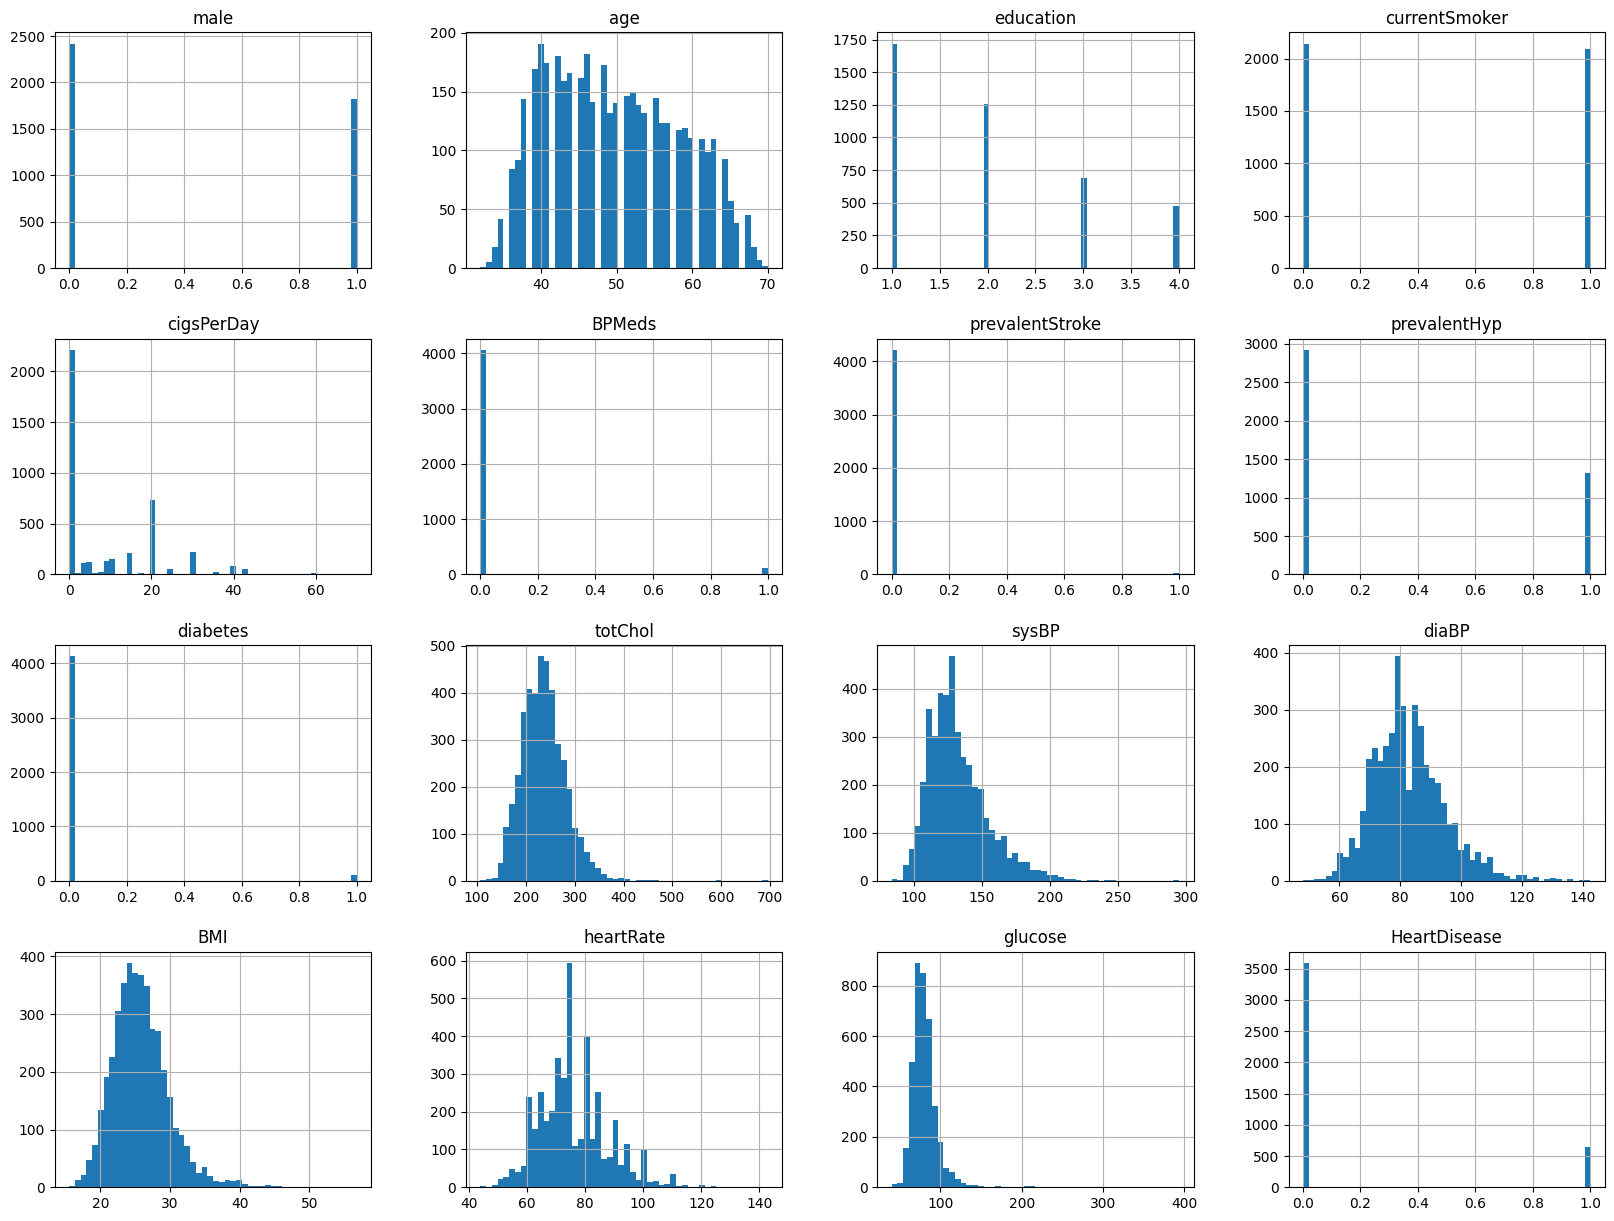

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins =50 , figsize = (20 , 15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.15, random_state=42)

# Step 2: Further split the training data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.1765, random_state=42)  # 0.1765 * 0.85 ≈ 0.15 of total

# Now, we have train, validation, and test datasets without overlap
print(len(train_data), len(val_data), len(test_data))


ModuleNotFoundError: No module named 'sklearn'

: 

In [8]:
train_copy = train_data.copy()
print(type(train_copy) , type(train_data))
# train_copy.plot(kind="scatter", x="BMI", y="heartRate")

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [9]:
# corr_matrix = train_copy.corr()
# corr_matrix["HeartDisease"].sort_values(ascending =False)
print(type(train_copy))

<class 'pandas.core.frame.DataFrame'>


In [10]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# train_copy.replace("NA", pd.NA, inplace=True)

# imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
# imputer.fit(train_copy)
# imputer.statistics_

In [11]:
# train_copy_transformed_array = imputer.transform(data_train)  # This returns a numpy array
# train_copy_transformed = pd.DataFrame(train_copy_transformed_array, columns=data_train.columns)

In [12]:
# print(train_copy_transformed.head())  # Display the transformed DataFrame

In [13]:
def categorical_indices():
    categorical_columns = []
    vals = [0.0, 1.0]
    
    for column in train_copy.columns:
        is_categorical = True
        unique_values = train_copy[column].unique()
        # print(unique_values)
        
        for val in unique_values:
            # print(val)
            
            # Check if the value is in our list of accepted values
            # or if it's a representation of NA/NaN
            if val not in vals and val != "nan" and not pd.isna(val):
                # print("Val str " , val , vals)
                is_categorical = False
                break
        
        if is_categorical:
            categorical_columns.append(column)
    
    return categorical_columns
    
categorical_columns = categorical_indices()
all_columns = train_copy.columns.tolist()
numeric_columns = [col for col in all_columns if col not in categorical_columns]

        
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

train_copy[numeric_columns] = numeric_imputer.fit_transform(train_copy[numeric_columns])

train_copy[categorical_columns] = categorical_imputer.fit_transform(train_copy[categorical_columns])


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

# Define the categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent"))
])

# Combine the numeric and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_columns),
    ('cat', cat_pipeline, categorical_columns)
])

# Create the full pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

transformed_data = full_pipeline.fit_transform(train_copy)
transformed_df = pd.DataFrame(transformed_data, columns=numeric_columns + categorical_columns)

In [15]:
x_train = transformed_df.drop(columns=['HeartDisease'])  
y_train = transformed_df['HeartDisease'].values
print(y_train.shape)




(2966,)


In [16]:
def min_max_scale(x): 
    return (x-x.min(axis = 0))/(x.max(axis=0) - x.min(axis=0))

In [17]:
import numpy as np

def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

def J(A, m, y):
    return -(1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

def gd(A, x, y, m):
    dW = (1/m) * np.dot(x.T, (A - y))
    db = (1/m) * np.sum(A - y)  
    return dW, db

def predict(w, b, x):
    z = np.dot(w , x.T) + b
    A = sigmoid(z)
    return np.where(A > 0.5, 1, 0)

def model(x, y, x_test , y_test , n_features, alpha, iterations):
    b = 0
    rows, columns = x.shape
    w = np.zeros(n_features)
    training_costs = []
    validation_loss = []
    z = np.dot(w , x.T) + b
    A = sigmoid(z)
    for i in range(iterations):
        dw, db = gd(A, x, y, rows)
        w -= alpha * dw
        b -= alpha * db
        
        cost = J(A, len(y), y)
        training_costs.append(cost)
        z_val = np.dot(w , x_test.T) + b
        A_val = sigmoid(z_val)
        val_loss = J(A_val, len(y_test), y_test)
        validation_loss.append(val_loss)
        z = np.dot(w , x.T) + b
        A = sigmoid(z)
            
    plt.figure(figsize=(12, 8))
    plt.plot(range(iterations), validation_loss, color='b', label='Validation Loss')
    plt.plot(range(iterations), training_costs, color='r', label='Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Training and Validation Loss vs. Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    #returning validation/testing accuracy
    
    y_pred = predict(w , b , x_val)

    return np.sum(y_pred == y_val)/ y_val.shape[0]



def model_train(x, y,  n_features, alpha, iterations):
    b = 0
    rows, columns = x.shape
    w = np.zeros(n_features)
    training_costs = []
    validation_loss = []
    z = np.dot(w , x.T) + b
    A = sigmoid(z)
    for i in range(iterations):
        dw, db = gd(A, x, y, rows)
        w -= alpha * dw
        b -= alpha * db
        
        cost = J(A, len(y), y)
        training_costs.append(cost)
            #print( " training loss " , cost)
        z = np.dot(w , x.T) + b
        A = sigmoid(z)
            
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), training_costs, color='r', label='Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Training Loss vs. Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    #returning validation/testing accuracy
    
    y_pred = predict(w , b , x_val)

    return np.sum(y_pred == y_val)/ y_val.shape[0]

df = full_pipeline.fit_transform(test_data)
df = pd.DataFrame(df, columns=numeric_columns + categorical_columns)
x_test = df.drop(columns=['HeartDisease'])  
y_test = df['HeartDisease'].values

df = full_pipeline.fit_transform(val_data)
df = pd.DataFrame(df, columns=numeric_columns + categorical_columns)
x_val = df.drop(columns=['HeartDisease'])  
y_val = df['HeartDisease'].values

# for validation and training loss: 

#val_accuracy=  model(min_max_scale(x_train), y_train, min_max_scale(x_test) , y_test, 15, 0.01, 1500)
#print(val_accuracy , " is the validation accuracy")


In [18]:
# print("\t\t\t\t MIN MAX SCALING VS NO SCALING :  LOSS VS ITERATION GRAPHS")

# print("No scaling accuracy : " , model_train(x_train , y_train , 15 , 0.01 , 1500))
# print(" min max scaling accuracy :  " , model_train(min_max_scale(x_train) , y_train , 15 , 0.01 , 1500))


					 CONFUSION MATRIX 


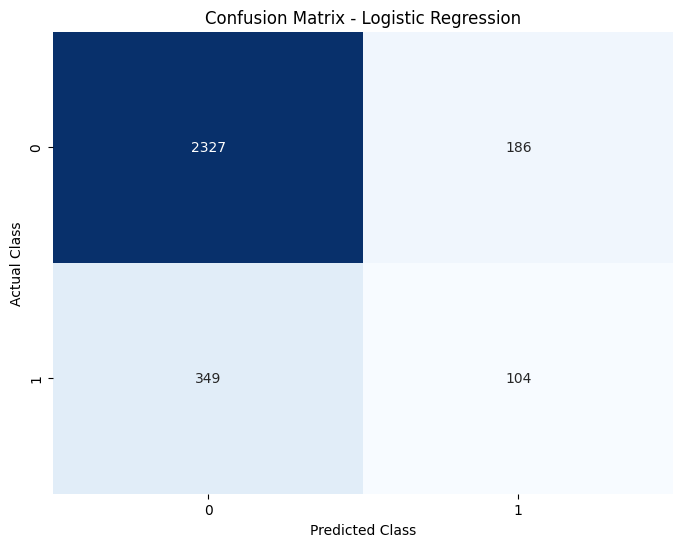


 Precision is  : 0.3586206896551724
 Recall score :  0.22958057395143489
F1 score :  0.27994616419919244
ROC-AUC score :  0.5777827262912766


In [19]:
print("\t\t\t\t\t CONFUSION MATRIX " )
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from sklearn.metrics import precision_score, recall_score ,f1_score , roc_auc_score , accuracy_score

def w_b(x , y , n_features , alpha , iterations):
    w = np.zeros(x.shape[1])
    b= 0
    for i in range(iterations): 
        z = np.dot(w , x.T )
        A = sigmoid(z)
        dw , db = gd(A , x , y , len(x))
        w -= alpha*dw
        b-= alpha*db
    return w , b

w , b = w_b(x_train , y_train , x_train.shape[1] , 0.01 , 1500)
y_train_pred = predict(w , b , x_train)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3) #cross val predict performs k fold value prediction. --> returns prediction on each test fold
conf_matrix = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

print("\n Precision is  :" , precision_score(y_train, y_train_pred))
print(" Recall score : " , recall_score(y_train, y_train_pred))
print("F1 score : " , f1_score(y_train , y_train_pred))
print("ROC-AUC score : " , roc_auc_score(y_train , y_train_pred))



			 STOCHASTIC GRADIENT DESCENT
cost function at  0  is :  6.757602103525721
cost function at  100  is :  4.0032969499626
cost function at  200  is :  3.8954402094919085
cost function at  300  is :  3.862212324534197
cost function at  400  is :  3.844397243828484
cost function at  500  is :  3.8325855721328157
cost function at  600  is :  3.824086929973072
cost function at  700  is :  3.8177368988520075
cost function at  800  is :  3.8128791366785464
cost function at  900  is :  3.809093478726219
cost function at  1000  is :  3.806094446379184
cost function at  1100  is :  3.8036832263090674
cost function at  1200  is :  3.8017182658910773
cost function at  1300  is :  3.800097160315091
cost function at  1400  is :  3.7987449187081337


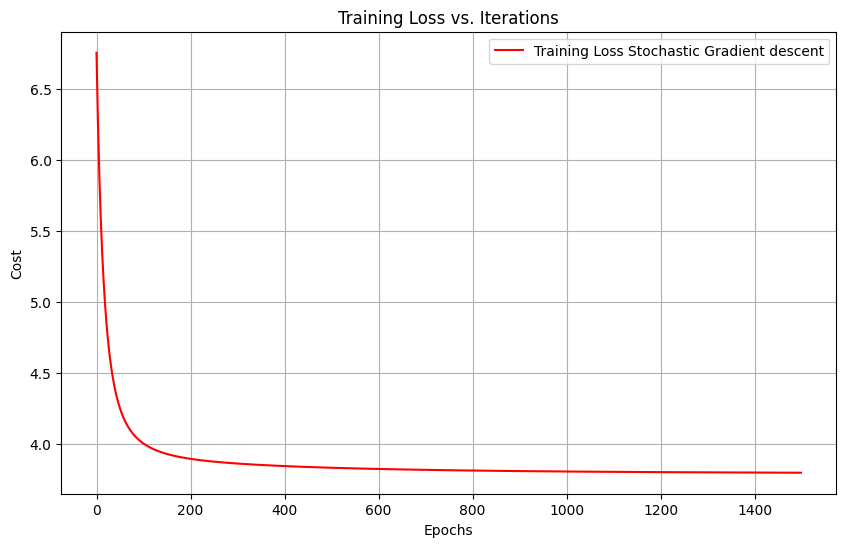

In [20]:
#Let's implement a Stochastic Gradient Descent function
print("\t\t\t STOCHASTIC GRADIENT DESCENT")
def sgd( x, y , alpha , epochs , batch_size): 
    w = np.zeros(x.shape[1])
    training_costs= []
    b  = 0
    for epoch in range(epochs):
        indices= np.random.permutation(x.shape[0])
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for i in range(0 , x.shape[0] , batch_size):
            x_training = x_shuffled[i : i+batch_size]
            y_training = y_shuffled[i:i+batch_size]
            dw , db  = gd(sigmoid(np.dot(w , x_training.T) + b), x_training , y_training , batch_size)
            w-= alpha*dw
            b-= alpha*db
        training_costs.append(J(sigmoid(np.dot(w , x.T) + b) ,batch_size, y))
        if epoch % 100 == 0:
            print( "cost function at " , epoch , " is : " , J(sigmoid(np.dot(w , x.T) + b), batch_size, y))
        # batch size is x.shape[0]/10
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), training_costs, color='r', label='Training Loss Stochastic Gradient descent')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Training Loss vs. Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()


sgd(np.array(x_train)  , np.array(y_train)   ,  0.01 , 1500 , int(x_train.shape[0]/10))

                  
        

				 MINI BATCH GRADIENT DESCENT
  x shape :  (2966, 15)  y shape  (2966,)
cost function at  0  is :  0.026381012894940038
cost function at  100  is :  0.008007532598073228
cost function at  200  is :  0.007217559695326038
cost function at  300  is :  0.006941407394450713
cost function at  400  is :  0.0067896998344397705
cost function at  500  is :  0.006685465053405654
cost function at  600  is :  0.006605842685402865
cost function at  700  is :  0.006541963410468779
cost function at  800  is :  0.006489400622056958
cost function at  900  is :  0.006445488207607165
cost function at  1000  is :  0.00640842725190553
cost function at  1100  is :  0.006376920379060127
cost function at  1200  is :  0.006349990615074168
cost function at  1300  is :  0.006326878844800976
cost function at  1400  is :  0.006306980832765185


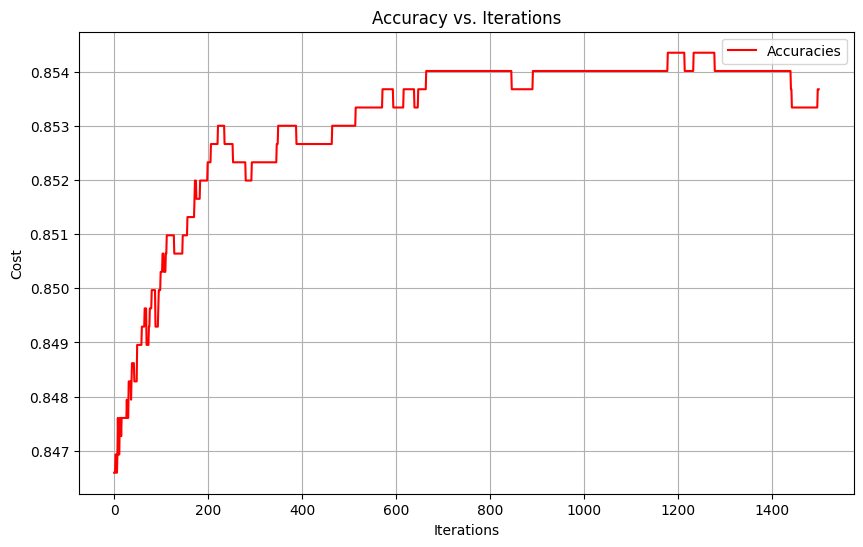

In [21]:
print("\t\t\t\t MINI BATCH GRADIENT DESCENT")

def mini_gd(x , y , iters , alpha ):
    w = np.zeros(x.shape[1])
    b =0 
    #define a mini batch
    batch = int(x.shape[0]/20)
    training_costs = []
    accuracies = []
    for iteration in range (iters):
        for i in range(0 , x.shape[0] , batch):
            x_training = x[i : i+ batch]
            y_training =  y[i: i+ batch]
            y_pred  = predict(w , b , x_training)
            error = np.sum(y_pred == y_training)
    
            #backward passing 
            dw , db  = gd(sigmoid(np.dot(w , x_training.T) + b), x_training , y_training , batch)
    
            w-= dw*alpha
            b-=db*alpha
        if iteration % 100 == 0:
            print( "cost function at " , iteration , " is : " , J(sigmoid(np.dot(w , x_training.T) + b), batch, y_training))
        training_costs.append(J(sigmoid(np.dot(w , x.T) + b) ,batch, y))
        y_pred =  predict(w , b , x)
        accuracies.append(np.sum(y_pred == y)/y.shape[0])
    #print training cost and accuracy as wished.                      
    plt.figure(figsize=(10, 6))
    plt.plot(range(iters), accuracies, color='r', label='Accuracies')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Accuracy vs. Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()


print("  x shape : " , x_train.shape , " y shape "  , y_train.shape)

mini_gd(np.array(x_train)  , np.array(y_train)   , 1500 ,0.01)




In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\t\t\t K-Cross Validation ")

def fold_indices(x, k): 
    fold_size = x.shape[0] // k
    indices = np.arange(x.shape[0])
    fold = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        fold.append([train_indices, test_indices])
    return fold

kf = fold_indices(np.array(x_train), 5)

def model_ksplit(x, y, x_test, y_test, n_features, alpha, iterations):
    b = 0
    rows, columns = x.shape
    w = np.zeros(n_features)
    for i in range(iterations):
        z = np.dot(w, x.T) + b
        A = sigmoid(z)
        dw, db = gd(A, x, y, rows)
        w -= alpha * dw
        b -= alpha * db
        
    y_pred = predict(w, b, x_test)
    return y_pred

def calc_pred_kfold(x, y): 
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for train_index, test_index in kf:
        x_training, y_training = x[train_index], y[train_index]
        x_testing, y_testing = x[test_index], y[test_index]
        y_pred = model_ksplit(x_training, y_training, x_testing, y_testing, x_training.shape[1], 0.01, 1000)
        
        accuracies.append(accuracy_score(y_testing, y_pred))
        precisions.append(precision_score(y_testing, y_pred))
        recalls.append(recall_score(y_testing, y_pred))
        f1_scores.append(f1_score(y_testing, y_pred))
    
    return accuracies, precisions, recalls, f1_scores

accuracies, precisions, recalls, f1_scores = calc_pred_kfold(np.array(x_train), np.array(y_train))
print("Mean of accuracy:", np.mean(accuracies),  " standard deviation :  " , np.std(accuracies))
print("Mean of precisions: " , np.mean(precisions) , " standard deviation :  " , np.std(precisions))
print("Mean of recalls: " , np.mean(recalls) , " standard deviation :  " , np.std(recalls))
print("Mean of f1_score: " , np.mean(f1_scores), " standard deviation :  " , np.std(f1_scores))



			 K-Cross Validation 
Mean of accuracy: 0.8462057335581786  standard deviation :   0.013716492011914175
Mean of precisions:  0.5  standard deviation :   0.27386127875258304
Mean of recalls:  0.026739433971546343  standard deviation :   0.008788911870554585
Mean of f1_score:  0.0503816199376947  standard deviation :   0.01674834984685916


			 IMPLEMENTING EARLY STOP IN GRADIENT DESCENT
Early stop, patience exceeds 5 at iteration 1071
Early stop, patience exceeds 5 at iteration 537


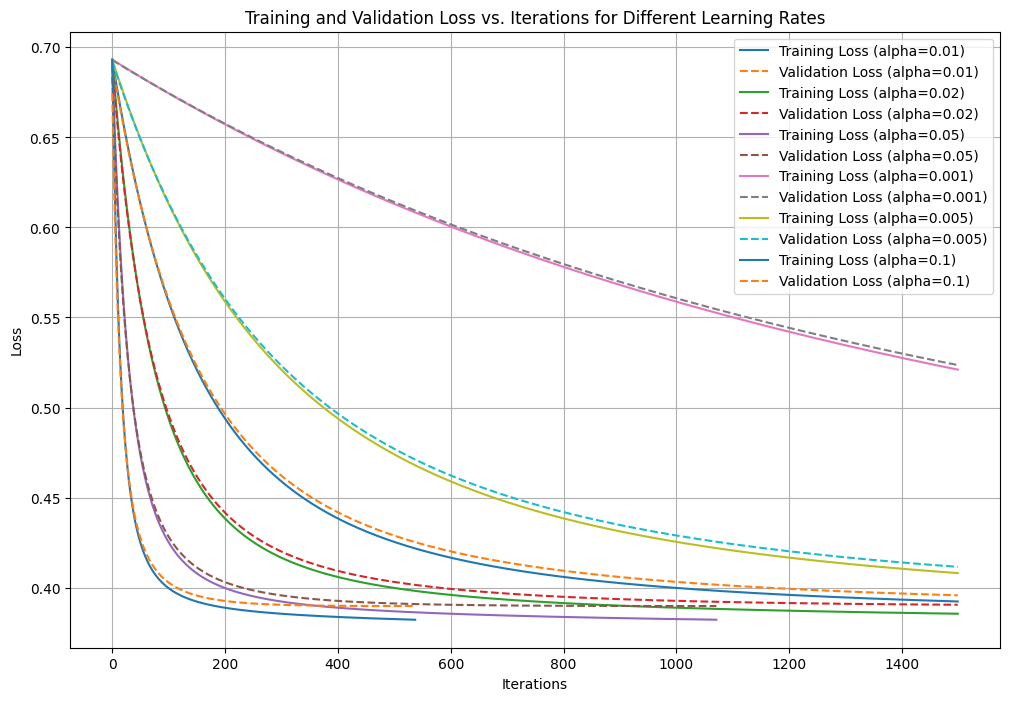

In [39]:
print("\t\t\t IMPLEMENTING EARLY STOP IN GRADIENT DESCENT")

def model_earlystop(X_train, y_train, X_val, y_val, n_features, alpha, iterations):
    b = 0
    rows, columns = X_train.shape
    w = np.zeros(n_features)
    training_costs = []
    validation_loss = []
    best_loss = float('inf')
    patience = 0

    for i in range(iterations):
        z = np.dot(w, X_train.T) + b
        A = sigmoid(z)

        dw, db = gd(A, X_train, y_train, rows)
        w -= alpha * dw
        b -= alpha * db

        cost = J(A, len(y_train), y_train)
        training_costs.append(cost)
        
        z_val = np.dot(w, X_val.T) + b
        A_val = sigmoid(z_val)
        val_loss = J(A_val, len(y_val), y_val)
        validation_loss.append(val_loss)

        # Early stopping condition
        if best_loss > val_loss:
            patience = 0
            best_loss = val_loss
        else:
            patience += 1
            if patience > 5:
                print("Early stop, patience exceeds 5 at iteration", i)
                break

    return training_costs, validation_loss
    
def plot_multiple_alphas(X_train, y_train, X_val, y_val, alphas, iterations):
    plt.figure(figsize=(12, 8))
    
    for alpha in alphas:
        training_loss, validation_loss = model_earlystop(X_train, y_train, X_val, y_val, X_train.shape[1], alpha, iterations)
        
        plt.plot(range(len(training_loss)), training_loss, label=f'Training Loss (alpha={alpha})')
        plt.plot(range(len(validation_loss)), validation_loss, label=f'Validation Loss (alpha={alpha})', linestyle='--')
    
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss vs. Iterations for Different Learning Rates')
    plt.legend()
    plt.grid(True)
    plt.show()



plot_multiple_alphas(x_train , y_train , x_val , y_val ,[0.01 , 0.02,0.05,0.001,0.005,0.1],1500)
plot_multiple_gds(x_train , y_train , x_val , y_val ,0.01 ,1500)

Learning Rate: 0.01, Regularization: None


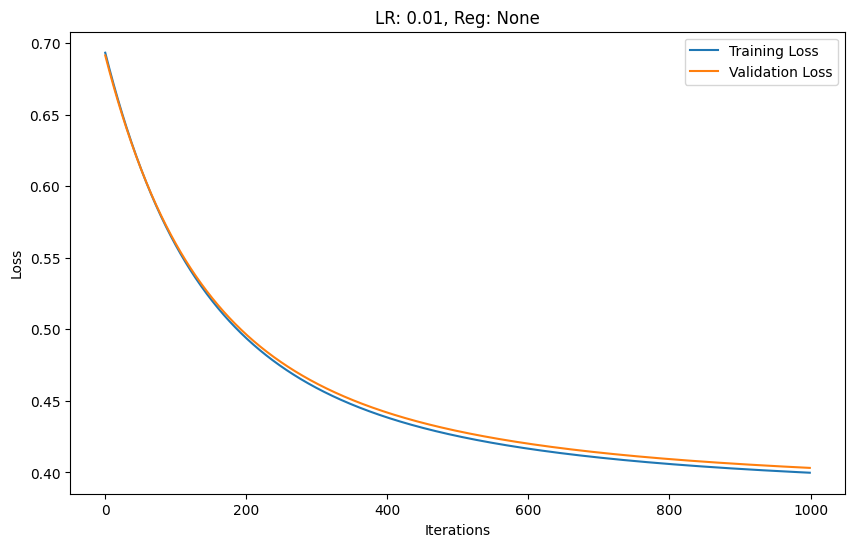

Learning Rate: 0.01, Regularization: L1


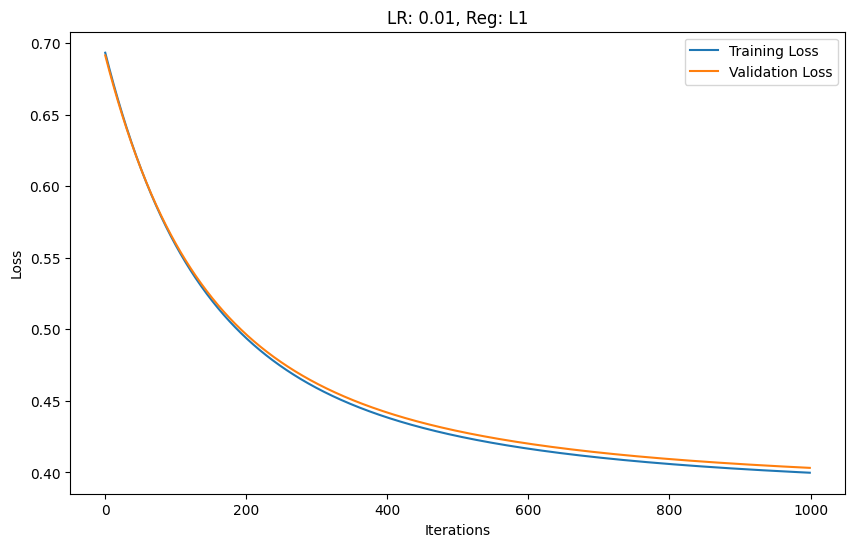

Learning Rate: 0.01, Regularization: L2


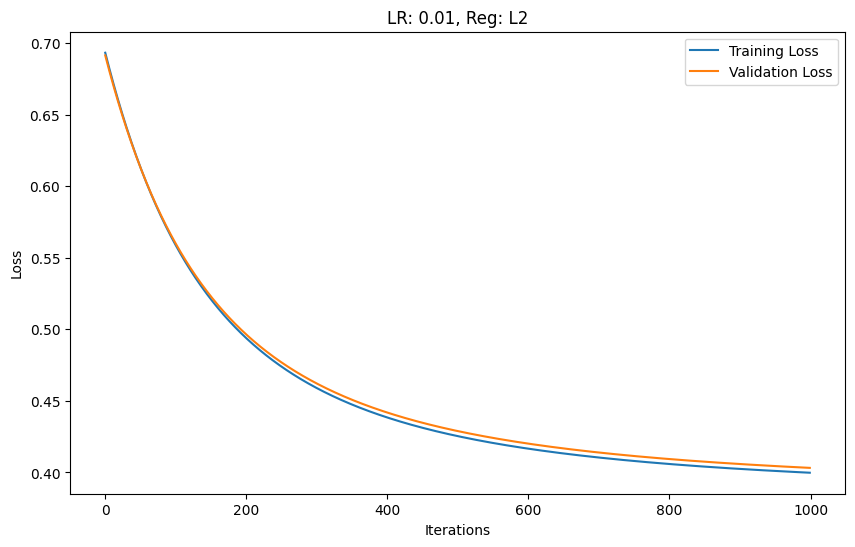

Learning Rate: 0.001, Regularization: None


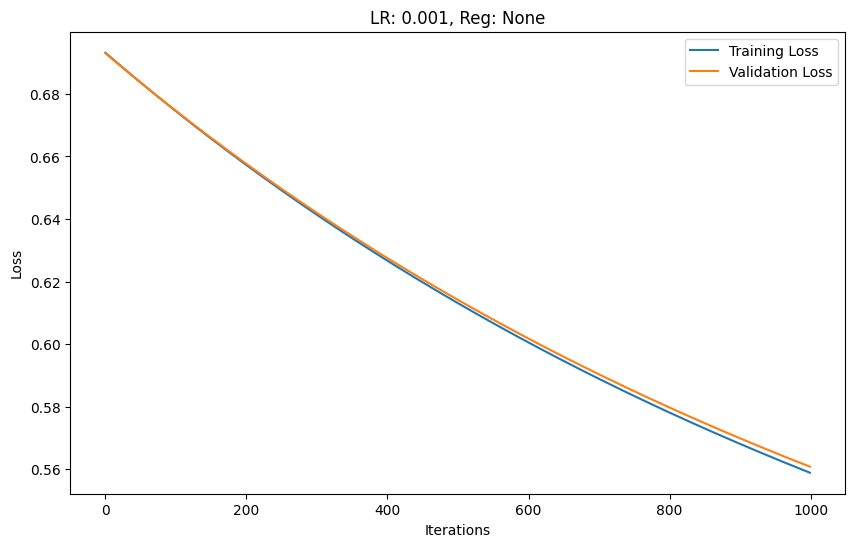

Learning Rate: 0.001, Regularization: L1


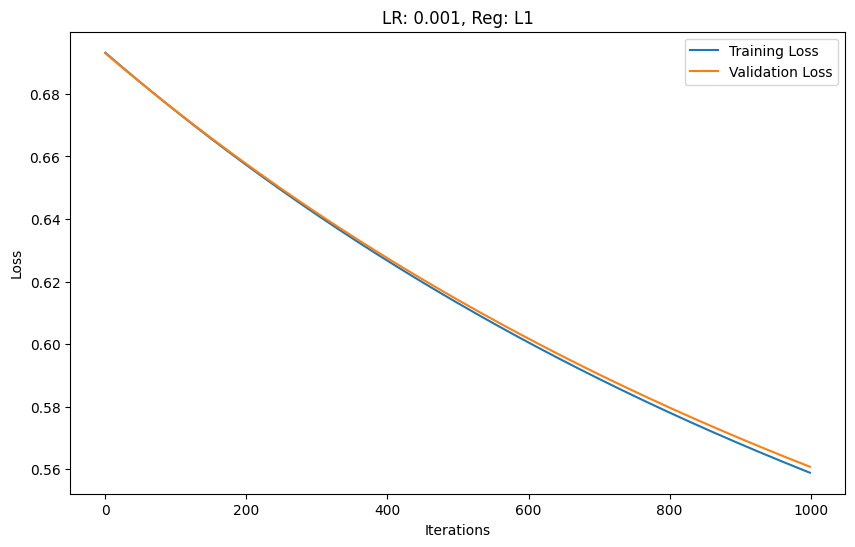

Learning Rate: 0.001, Regularization: L2


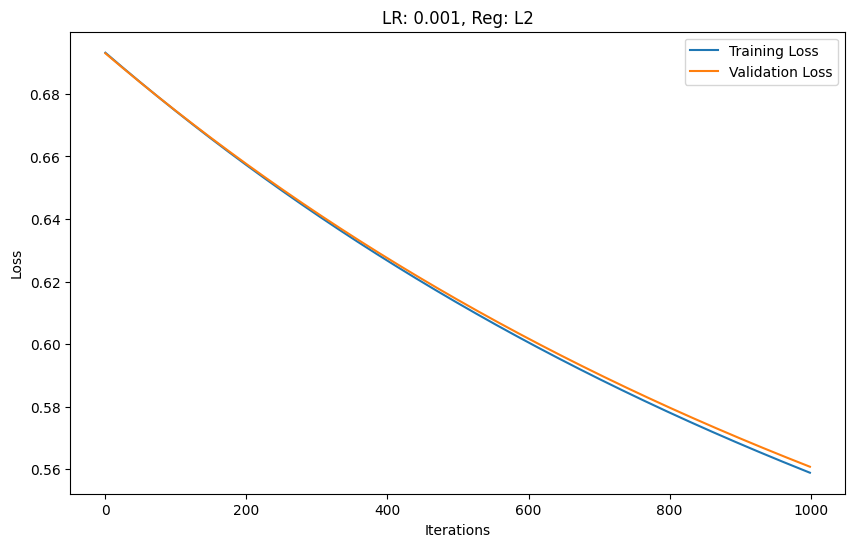

In [55]:
def J_regularised(A , m  , y, regEx , lmd_val):
    loss = (-1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    if regEx == "L1":
        loss += (lmd_val / m) * np.sum(np.abs(w))
    else:
        loss += (lmd_val / (2 * m)) * np.sum(w ** 2)

    return loss

def gd_regularised(A, x, y, m,  regEx , lmd_val):
    dw = np.dot(x.T, (A - y)) / m
    db = np.sum(A - y) / m
    if reg_type == 'L2':
        dw += (reg_lambda / m) * w
    elif reg_type == 'L1':
        dw += (reg_lambda / m) * np.sign(w)
        
    return dw, db

def model_regularised(x, y, X_val, y_val,alpha, iterations , regEx  , lmd_val, patience):
    b = 0
    rows, columns = x.shape
    w = np.zeros(columns)
    training_costs = []
    validation_loss = []
    best_loss = float('inf')
    for i in range(iterations):
        z = np.dot(w, x.T) + b
        A = sigmoid(z)

        dw, db = gd(A, x, y, rows)
        w -= alpha * dw
        b -= alpha * db

        training_cost = J_regularised(A, len(y), y , "L1",lmd_val)
        A_val = sigmoid(np.dot(w,x_val.T)+b)
        val_loss =  J_regularised(A_val, len(y_val) , y_val , "L1" , lmd_val)
        training_costs.append(training_cost)
        validation_loss.append(val_loss)

        # Early stopping condition
        if best_loss > val_loss:
            patience = 0
            best_loss = val_loss
        else:
            patience += 1
            if patience > 5:
                print("Early stop, patience exceeds 5 at iteration", i)
                break

    return w,b,training_costs, validation_loss

def plot_loss(training_loss, validation_loss, title):
    plt.figure(figsize=(10, 6))
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

learning_rates = [0.01, 0.001]
reg_types = [None, 'L1', 'L2']
reg_lambda = 0.01
patience = 10

for lr in learning_rates:
    for reg in reg_types:
        print(f"Learning Rate: {lr}, Regularization: {reg}")
        w, b, training_loss, validation_loss = model_regularised(
            x_train, y_train, x_val, y_val,
            alpha=lr,
            iterations=1000,
            regEx=reg,
            lmd_val=reg_lambda,
            patience=patience
        )
        plot_loss(training_loss, validation_loss, f"LR: {lr}, Reg: {reg}")